In [152]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
import numpy as np
import re
from nltk.corpus import stopwords
from nltk.tokenize import word_tokenize
import matplotlib.pyplot as plt

In [153]:
df_apps = pd.read_csv('playstore_apps.csv')
print(df_apps.columns)
df_reviews = pd.read_csv('playstore_reviews.csv')
print(df_reviews.columns)

Index(['App', 'Category', 'Rating', 'Reviews', 'Size', 'Installs', 'Type',
       'Price', 'Content Rating', 'Genres', 'Last Updated', 'Current Ver',
       'Android Ver'],
      dtype='object')
Index(['App', 'Translated_Review', 'Sentiment', 'Sentiment_Polarity',
       'Sentiment_Subjectivity'],
      dtype='object')


In [154]:
df_apps.drop(['Last Updated', 'Current Ver', 'Android Ver', 'Size'], axis=1, inplace=True)
df_apps.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 10841 entries, 0 to 10840
Data columns (total 9 columns):
 #   Column          Non-Null Count  Dtype  
---  ------          --------------  -----  
 0   App             10841 non-null  object 
 1   Category        10841 non-null  object 
 2   Rating          9367 non-null   float64
 3   Reviews         10840 non-null  float64
 4   Installs        10840 non-null  float64
 5   Type            10840 non-null  object 
 6   Price           10840 non-null  float64
 7   Content Rating  10840 non-null  object 
 8   Genres          10841 non-null  object 
dtypes: float64(4), object(5)
memory usage: 762.4+ KB


In [155]:
# Remove duplicates from the dataset

df_apps.drop_duplicates(inplace=True)
df_apps.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 10356 entries, 0 to 10840
Data columns (total 9 columns):
 #   Column          Non-Null Count  Dtype  
---  ------          --------------  -----  
 0   App             10356 non-null  object 
 1   Category        10356 non-null  object 
 2   Rating          8891 non-null   float64
 3   Reviews         10355 non-null  float64
 4   Installs        10355 non-null  float64
 5   Type            10355 non-null  object 
 6   Price           10355 non-null  float64
 7   Content Rating  10355 non-null  object 
 8   Genres          10356 non-null  object 
dtypes: float64(4), object(5)
memory usage: 809.1+ KB


In [156]:
# Check for null values in the dataset
null_values = df_apps.isnull().sum()

# Iterate over each column
for column in df_apps.columns:
    # Check if the column has null values
    if null_values[column] > 0:
        # Check if the column data type is numeric
        if pd.api.types.is_numeric_dtype(df_apps[column]):
            # Replace null values with the mean of the column
            df_apps[column].fillna(df_apps[column].mean(), inplace=True)
        else:
            # Replace null values with the most frequent value in the column
            most_frequent_value = df_apps[column].mode().iloc[0]
            df_apps[column].fillna(most_frequent_value, inplace=True)
            
df_apps.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 10356 entries, 0 to 10840
Data columns (total 9 columns):
 #   Column          Non-Null Count  Dtype  
---  ------          --------------  -----  
 0   App             10356 non-null  object 
 1   Category        10356 non-null  object 
 2   Rating          10356 non-null  float64
 3   Reviews         10356 non-null  float64
 4   Installs        10356 non-null  float64
 5   Type            10356 non-null  object 
 6   Price           10356 non-null  float64
 7   Content Rating  10356 non-null  object 
 8   Genres          10356 non-null  object 
dtypes: float64(4), object(5)
memory usage: 809.1+ KB


In [157]:
# Keep the apps having type free or paid only. if there are any other values other than free or paid change them 
# to the type having the maximum count.

# Get the unique values and their counts in the 'Type' column
type_counts = df_apps['Type'].value_counts()

# Get the type with the maximum count
max_count_type = type_counts.idxmax()

# Replace any other values in the 'Type' column with the maximum count type
df_apps.loc[~df_apps['Type'].isin(['free', 'paid']), 'Type'] = max_count_type

print(df_apps['Type'].value_counts())

Free    10356
Name: Type, dtype: int64


In [158]:
# Remove apps with irrelevent names starting with ?

df_apps = df_apps[~df_apps['App'].str.startswith('?')]
df_apps.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 10326 entries, 0 to 10840
Data columns (total 9 columns):
 #   Column          Non-Null Count  Dtype  
---  ------          --------------  -----  
 0   App             10326 non-null  object 
 1   Category        10326 non-null  object 
 2   Rating          10326 non-null  float64
 3   Reviews         10326 non-null  float64
 4   Installs        10326 non-null  float64
 5   Type            10326 non-null  object 
 6   Price           10326 non-null  float64
 7   Content Rating  10326 non-null  object 
 8   Genres          10326 non-null  object 
dtypes: float64(4), object(5)
memory usage: 806.7+ KB


In [159]:
# check for rows with the value 'nan' and remove the rows with the value 'nan'

df_reviews = df_reviews.dropna(subset=['App'])
df_reviews.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 64295 entries, 0 to 64294
Data columns (total 5 columns):
 #   Column                  Non-Null Count  Dtype  
---  ------                  --------------  -----  
 0   App                     64295 non-null  object 
 1   Translated_Review       37427 non-null  object 
 2   Sentiment               37432 non-null  object 
 3   Sentiment_Polarity      37432 non-null  float64
 4   Sentiment_Subjectivity  37432 non-null  float64
dtypes: float64(2), object(3)
memory usage: 2.9+ MB


In [160]:
# Remove rows with nan values in the  Reviews dataset

# Remove rows with 'nan' values in the specified columns
columns_with_nan = ['App', 'Translated_Review', 'Sentiment', 'Sentiment_Polarity', 'Sentiment_Subjectivity']
df_reviews.dropna(subset=columns_with_nan, inplace=True)

# Return the updated DataFrame
df_reviews.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 37427 entries, 0 to 64230
Data columns (total 5 columns):
 #   Column                  Non-Null Count  Dtype  
---  ------                  --------------  -----  
 0   App                     37427 non-null  object 
 1   Translated_Review       37427 non-null  object 
 2   Sentiment               37427 non-null  object 
 3   Sentiment_Polarity      37427 non-null  float64
 4   Sentiment_Subjectivity  37427 non-null  float64
dtypes: float64(2), object(3)
memory usage: 1.7+ MB


In [161]:
print(df_reviews.columns)
print(df_apps.columns)

Index(['App', 'Translated_Review', 'Sentiment', 'Sentiment_Polarity',
       'Sentiment_Subjectivity'],
      dtype='object')
Index(['App', 'Category', 'Rating', 'Reviews', 'Installs', 'Type', 'Price',
       'Content Rating', 'Genres'],
      dtype='object')


In [162]:
# Which are the top 10 apps having the highest rating in the given available dataset?

# Sort the DataFrame by 'Rating' column in descending order
df_apps_sorted = df_apps.sort_values('Rating', ascending=False)

# Get the top 10 apps with the highest rating
top_10_apps = df_apps_sorted.head(10)

# Print the top 10 apps
print("Top 10 Apps with Highest Rating:")
print(top_10_apps[['App', 'Rating']])

Top 10 Apps with Highest Rating:
                                           App  Rating
10472  Life Made WI-Fi Touchscreen Photo Frame    19.0
7754                                 CricQuick     5.0
6727                                 BS-Mobile     5.0
7270                             CF Townsville     5.0
6467                           BM SPM Practice     5.0
5118                          Eternal Light AG     5.0
9061                 Cloud DX Connected Health     5.0
5238             Selfie With Champion AJ Style     5.0
6726             COMSATS BOOK STORE FOR BS(CS)     5.0
5108                      Lakeside AG Moultrie     5.0


In [163]:
# What is the number of installs and reviews for the top 5 most reviewed apps?

# Sort the DataFrame by 'Reviews' column in descending order
df_apps = df_apps.sort_values('Reviews', ascending=False)

# Get the top 5 most reviewed apps
top_5_most_reviewed_apps = df_apps.head(5)

# Extract the 'App', 'Reviews', and 'Installs' columns for the top 5 apps
top_5_apps_info = top_5_most_reviewed_apps[['App', 'Reviews', 'Installs']]

# Print the number of installs and reviews for the top 5 apps
print("Number of Installs and Reviews for Top 5 Most Reviewed Apps:")
print(top_5_apps_info)

Number of Installs and Reviews for Top 5 Most Reviewed Apps:
                     App     Reviews      Installs
2544            Facebook  78158306.0  1.000000e+09
3943            Facebook  78128208.0  1.000000e+09
336   WhatsApp Messenger  69119316.0  1.000000e+09
3904  WhatsApp Messenger  69109672.0  1.000000e+09
2604           Instagram  66577446.0  1.000000e+09


In [164]:
# Which app has the highest number of reviews? Also, mention the number of reviews and category of the app

# Find the app with the highest number of reviews
max_reviews_app = df_apps[df_apps['Reviews'] == df_apps['Reviews'].max()]

# Extract the app name, number of reviews, and category
app_name = max_reviews_app['App'].values[0]
num_reviews = max_reviews_app['Reviews'].values[0]
category = max_reviews_app['Category'].values[0]

# Print the app with the highest number of reviews
print("App with the Highest Number of Reviews:")
print("App Name:", app_name)
print("Number of Reviews:", num_reviews)
print("Category:", category)

App with the Highest Number of Reviews:
App Name: Facebook
Number of Reviews: 78158306.0
Category: SOCIAL


In [165]:
# What is the total amount of revenue generated by the google play store by hosting apps? 
# (Whenever a user buys apps  from the google play store, the amount is considered in the revenue)

# Calculate the revenue for each app
df_apps['Revenue'] = df_apps['Price'] * df_apps['Installs']

# Calculate the total revenue generated by the Google Play Store
total_revenue = df_apps['Revenue'].sum()

# Print the total revenue
print("Total Revenue Generated by Google Play Store:", total_revenue)

Total Revenue Generated by Google Play Store: 378069269.87493706


In [166]:
# Which Category of google play store apps has the highest number of installs? 
# Also, find out the total number of installs for that particular category.

# Group the apps by category and calculate the total number of installs for each category
category_installs = df_apps.groupby('Category')['Installs'].sum()

# Find the category with the highest number of installs
category_with_highest_installs = category_installs.idxmax()

# Find the total number of installs for the category with the highest installs
total_installs_highest_category = category_installs.loc[category_with_highest_installs]

# Print the category with the highest number of installs and the total number of installs for that category
print("Category with the Highest Number of Installs:", category_with_highest_installs)
print("Total Installs for the Highest Category:", total_installs_highest_category)

Category with the Highest Number of Installs: GAME
Total Installs for the Highest Category: 31493924415.0


In [167]:
# Which Genre has the most number of published apps?

# Count the number of apps in each genre
genre_counts = df_apps['Genres'].value_counts()

# Find the genre with the most number of published apps
genre_with_most_apps = genre_counts.idxmax()

# Get the count of apps for the genre with the most apps
most_apps_count = genre_counts.loc[genre_with_most_apps]

# Print the genre with the most number of published apps and the count of apps
print("Genre with the Most Number of Published Apps:", genre_with_most_apps)
print("Number of Apps in the Most Popular Genre:", most_apps_count)

Genre with the Most Number of Published Apps: Tools
Number of Apps in the Most Popular Genre: 839


In [168]:
# Provide the list of all games ordered in such a way that the game that has the highest number of 
# installs is displayed on the top

# Filter the dataset to include only games
games_df = df_apps[df_apps['Category'] == 'GAME']

# Sort the games by the number of installs in descending order
sorted_games = games_df.sort_values(by='Installs', ascending=False)

# Display the sorted games
sorted_games[['App', 'Installs']]

,App,Installs
1872,Subway Surfers,1.000000e+09
1750,Subway Surfers,1.000000e+09
1700,Subway Surfers,1.000000e+09
1654,Subway Surfers,1.000000e+09
3896,Subway Surfers,1.000000e+09
...,...,...
10697,Mu.F.O.,1.000000e+00
5846,YAKALA AY,1.000000e+00
4218,D+H Reaction Wall,1.000000e+00
5917,Ra Ga Ba,1.000000e+00


In [169]:
# How many apps from the given data set are free? Also, provide the number of paid apps.

# Count the number of free apps
num_free_apps = df_apps[df_apps['Type'] == 'Free'].shape[0]

# Count the number of paid apps
num_paid_apps = df_apps[df_apps['Type'] == 'Paid'].shape[0]

# Print the results
print("Number of Free Apps:", num_free_apps)
print("Number of Paid Apps:", num_paid_apps)

Number of Free Apps: 10326
Number of Paid Apps: 0


In [170]:
# Which is the best dating app? (Best dating app is the one having the highest number of Reviews)

# Filter the dataset to include only dating apps
dating_apps_df = df_apps[df_apps['Category'] == 'DATING']

# Find the app with the highest number of reviews
best_dating_app = dating_apps_df.loc[dating_apps_df['Reviews'].idxmax()]

# Display the name of the best dating app and its number of reviews
best_dating_app_name = best_dating_app['App']
best_dating_app_reviews = best_dating_app['Reviews']
print("The best dating app is:", best_dating_app_name)
print("Number of reviews:", best_dating_app_reviews)

The best dating app is: Zoosk Dating App: Meet Singles
Number of reviews: 516917.0


In [171]:
print(df_reviews.columns)

Index(['App', 'Translated_Review', 'Sentiment', 'Sentiment_Polarity',
       'Sentiment_Subjectivity'],
      dtype='object')


In [172]:
df_reviews.head()

,App,Translated_Review,Sentiment,Sentiment_Polarity,Sentiment_Subjectivity
0,10 Best Foods for You,I like eat delicious food. That's I'm cooking ...,Positive,1.00,0.533333
1,10 Best Foods for You,This help eating healthy exercise regular basis,Positive,0.25,0.288462
3,10 Best Foods for You,Works great especially going grocery store,Positive,0.40,0.875000
4,10 Best Foods for You,Best idea us,Positive,1.00,0.300000
5,10 Best Foods for You,Best way,Positive,1.00,0.300000


In [173]:
unique_sentiments = df_reviews['Sentiment'].unique()

# Display the unique entries
print("Unique sentiments:", unique_sentiments)

Unique sentiments: ['Positive' 'Neutral' 'Negative']


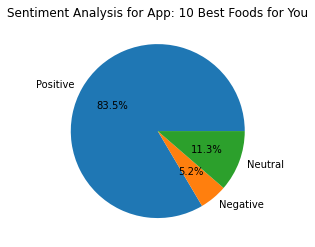

Number of positive reviews: 162
Number of negative reviews: 10


In [174]:
# Get the number of reviews having positive sentiment and the number of reviews having negative 
# sentiment for the app 10 best foods for You and compare them.

# Filter the dataset for the app "10 best foods for You"
app_reviews = df_reviews[df_reviews['App'] == '10 Best Foods for You']

# Count the number of positive and negative reviews
positive_count = app_reviews[app_reviews['Sentiment'] == 'Positive'].shape[0]
negative_count = app_reviews[app_reviews['Sentiment'] == 'Negative'].shape[0]
neutral_count = app_reviews[app_reviews['Sentiment'] == 'Neutral'].shape[0]

# Create labels and counts for the sentiments
sentiments = ['Positive', 'Negative', 'Neutral']
counts = [positive_count, negative_count, neutral_count]

# Plot the pie chart
plt.pie(counts, labels=sentiments, autopct='%1.1f%%')
plt.title('Sentiment Analysis for App: 10 Best Foods for You')

# Display the pie chart
plt.show()


# Display the counts
print("Number of positive reviews:", positive_count)
print("Number of negative reviews:", negative_count)


In [175]:
# Which comments of ASUS SuperNote have sentiment polarity and sentiment subjectivity both as 1?

# Filter the dataset for the app "ASUS SuperNote"
app_reviews = df_reviews[df_reviews['App'] == 'ASUS SuperNote']

# Filter for comments with sentiment polarity and subjectivity both equal to 1
filtered_reviews = app_reviews[(app_reviews['Sentiment_Polarity'] == 1) & (app_reviews['Sentiment_Subjectivity'] == 1)]

# Retrieve the comments
comments = filtered_reviews['Translated_Review']

# Display the comments
for comment in comments:
    print(comment)

Awesome!!!!


In [176]:
# Get all the neutral sentiment reviews for the app Abs Training-Burn belly fat

# Filter the dataset for the app "Abs Training-Burn belly fat"
app_reviews = df_reviews[df_reviews['App'] == 'Abs Training-Burn belly fat']

# Filter for neutral sentiment reviews
neutral_reviews = app_reviews[app_reviews['Sentiment'] == 'Neutral']

# Retrieve the neutral sentiment reviews
neutral_comments = neutral_reviews['Translated_Review']

# Display the neutral sentiment reviews
for comment in neutral_comments:
    print(comment)

I would recommend anyone struggling exercise alone. Be encouraged & get help need.
I'm sticking literally kicked booty pain gain
Needs work voice tells take break voice keeps going
Pop ads middle night!!! Taking phone? F*** app!
I day day I saw difference I went XL medium size


In [177]:
# Extract all negative sentiment reviews for Adobe Acrobat Reader with their sentiment polarity and sentiment subjectivity

# Filter the dataset for the app "Adobe Acrobat Reader" and negative sentiment
app_reviews = df_reviews[(df_reviews['App'] == 'Adobe Acrobat Reader') & (df_reviews['Sentiment'] == 'Negative')]

# Extract the negative sentiment reviews, polarity, and subjectivity
negative_reviews = app_reviews[['Translated_Review', 'Sentiment_Polarity', 'Sentiment_Subjectivity']]

# Display the negative sentiment reviews
print(negative_reviews)

                                      Translated_Review  Sentiment_Polarity  \
4146  Not Another Damn Cloud Account! I want another...           -0.300000   
4154  The previous versions good enough.... This upd...           -0.144444   
4155  Hey Pls update app.... I'm face issues... When...           -0.012500   
4171  Forces account password means Google knowledge...           -0.275000   
4186  Not Another Damn Cloud Account! I want another...           -0.300000   
4194  The previous versions good enough.... This upd...           -0.144444   
4195  Hey Pls update app.... I'm face issues... When...           -0.012500   
4211  Forces account password means Google knowledge...           -0.275000   
4217  Forces account password means Google knowledge...           -0.275000   
4225  Not Another Damn Cloud Account! I want another...           -0.300000   
4232  The previous versions good enough.... This upd...           -0.144444   
4233  Hey Pls update app.... I'm face issues... When